In [106]:
#!pip install syntheval

In [107]:
import pandas as pd
import numpy as np

In [108]:
# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
os.chdir('d:/maxim/Dissertation/first')

In [109]:
# Load datasets
original_data = pd.read_csv('./datasets/data.csv')
generated_data = pd.read_csv('./llama3-8b/results/synthetic_data_llama_3_8b.csv')

# Subset the datasets to the minimum length
#min_len = min(len(original_data), len(generated_data))
#original_data = original_data.iloc[:min_len]
#generated_data = generated_data.iloc[:min_len]


# Divide the original dataset into a training and a test set
train_set = original_data.sample(frac=0.8, random_state=0)
test_set = original_data.drop(train_set.index)
columns = train_set.columns

# Drop 'Age' in columns
categorical_columns = columns.drop('Age')

In [117]:
target_column = "Disease"
print(original_data[target_column])

0        Influenza
1      Common Cold
2           Eczema
3           Asthma
4           Asthma
          ...     
344         Stroke
345         Stroke
346         Stroke
347         Stroke
348         Stroke
Name: Disease, Length: 349, dtype: object


In [111]:
print(train_set.shape)
print(test_set.shape)
print(original_data.shape)
print(generated_data.shape)

(279, 10)
(70, 10)
(349, 10)
(948, 10)


SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: pca:   6%|▌         | 1/18 [00:00<00:02,  6.76it/s]


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

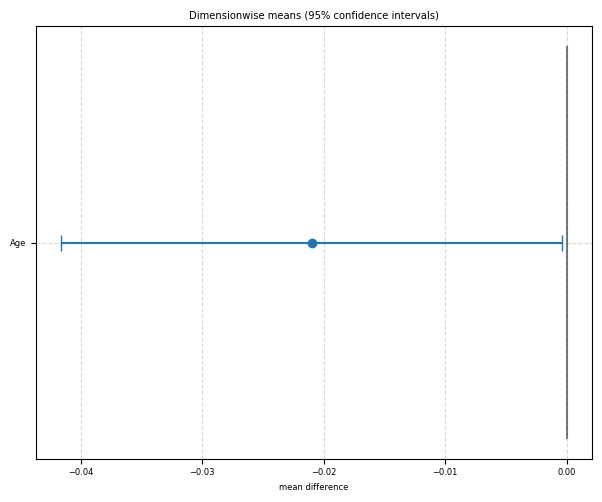

In [116]:
from syntheval import SynthEval

evaluator = SynthEval(original_data)
_ = evaluator.evaluate(generated_data, target_column, "full_eval", categorical_columns=categorical_columns)